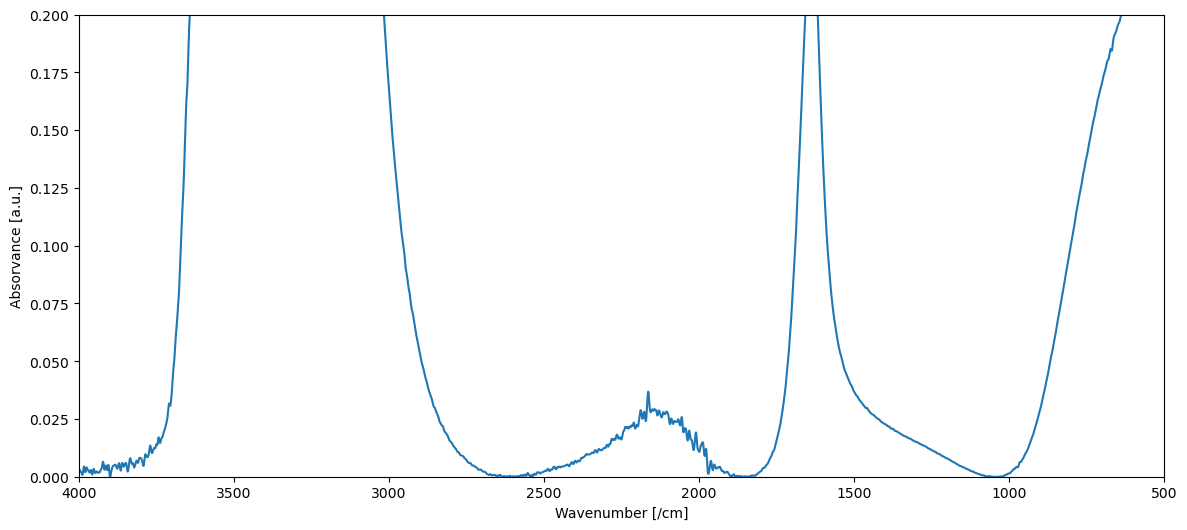

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'file'
df = pd.read_csv(data_file, header=0, index_col=0)

x = df.index.astype(float)
z = df.values.T

fig, ax = plt.subplots(figsize=(14.0, 6.0))
plt.xlim(4000, 500)
plt.ylim(0, 0.2)
ax.plot(x, z.T[:, 0])
ax.set_xlabel("Wavenumber [/cm]")
ax.set_ylabel("Absorvance [a.u.]")

plt.show()


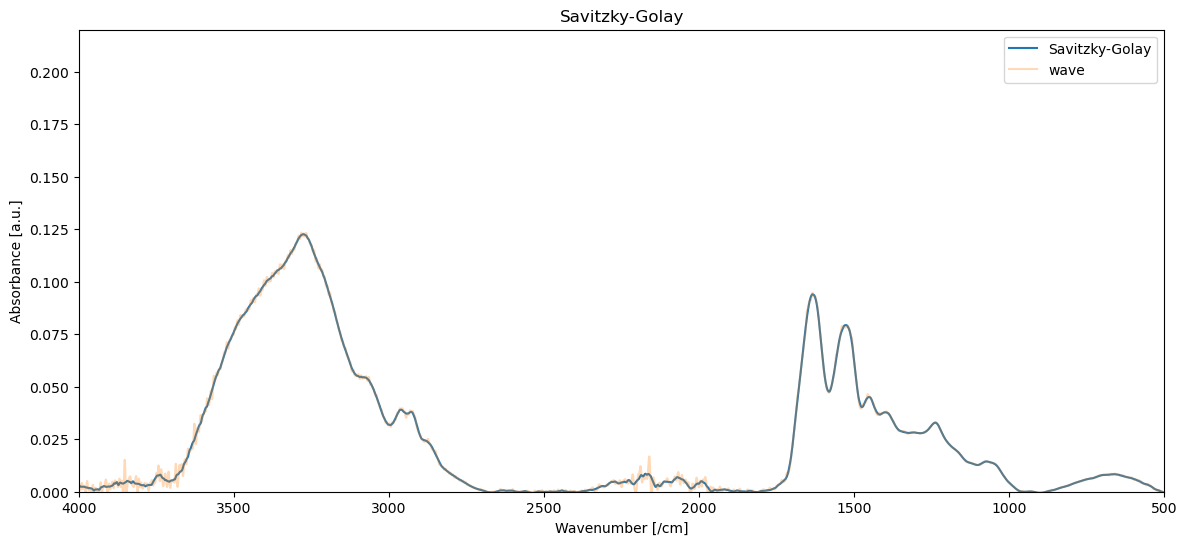

In [63]:
import scipy.signal

# 多項式の次数: 2
# フレーム長: 5
y = scipy.signal.savgol_filter(z.T[:, len(df.T)-1], 47, 2, mode="nearest")

fig, ax = plt.subplots(figsize=(14.0, 6.0))
ax.plot(x, y, label='Savitzky-Golay')
ax.plot(x, z.T[:, len(df.T)-1], alpha=0.3, label='wave')
ax.set_xlabel("Wavenumber [/cm]")
ax.set_ylabel("Absorbance [a.u.]")
plt.xlim(4000, 500)
plt.ylim(0, 0.22)
plt.legend()
plt.title("Savitzky-Golay")
plt.show()

In [64]:
# 空のデータフレームの作成
cols = df.columns
index = df.index
smoothing_data = pd.DataFrame(index=index, columns=cols)

In [65]:
for i in range(len(df.T)):
    data = df.iloc[:, i]
    y = df.values
    y = scipy.signal.savgol_filter(z.T[:, i], 47, 2, mode="nearest")
    if y[2000:2800].max() > 0.001:
       smoothing_data.iloc[:, i] = y
smoothing_data.to_csv("file")
df = smoothing_data

Text(0, 0.5, 'Absorbance (a.u.)')

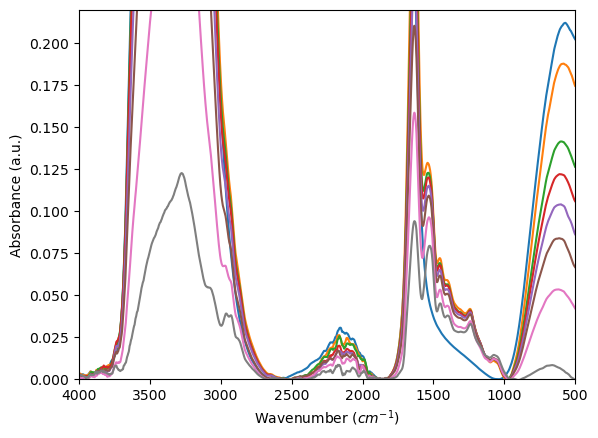

In [66]:
list = []
for i in range(len(df.T)):
    list.append(str(i))
data = smoothing_data.set_axis(list, axis='columns')

z = data.values.T
y = data.columns.astype(float)
x = data.index.astype(float)

for i in range(len(df.T)):
    plt.plot(x, z.T[:, i])
plt.xlim(4000, 500)
plt.ylim(0, 0.22)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorbance (a.u.)')